In [55]:
# import library
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import pandas as pd
import numpy as np
import math as mh

In [27]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-16828617.py:2: SyntaxWarning: invalid escape sequence '\s'
  raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)


In [60]:
l = [data[:, [i]] for i in range(len(data[0]))]
description = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

In [64]:
nrows = mh.ceil(len(data[0])/2)

Text(0, 0.5, 'Price')

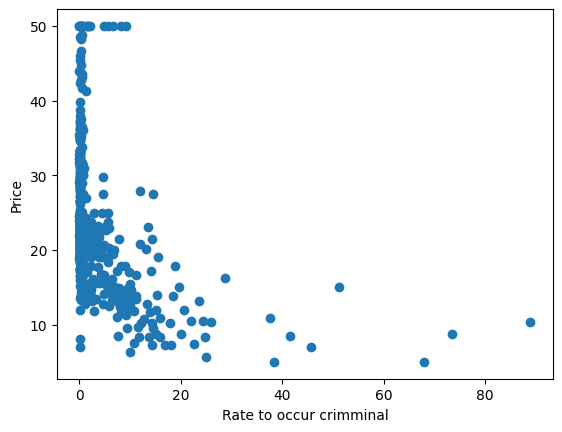

In [63]:
plt.scatter(l[0], target)
plt.xlabel("Rate to occur crimminal")
plt.ylabel("Price")

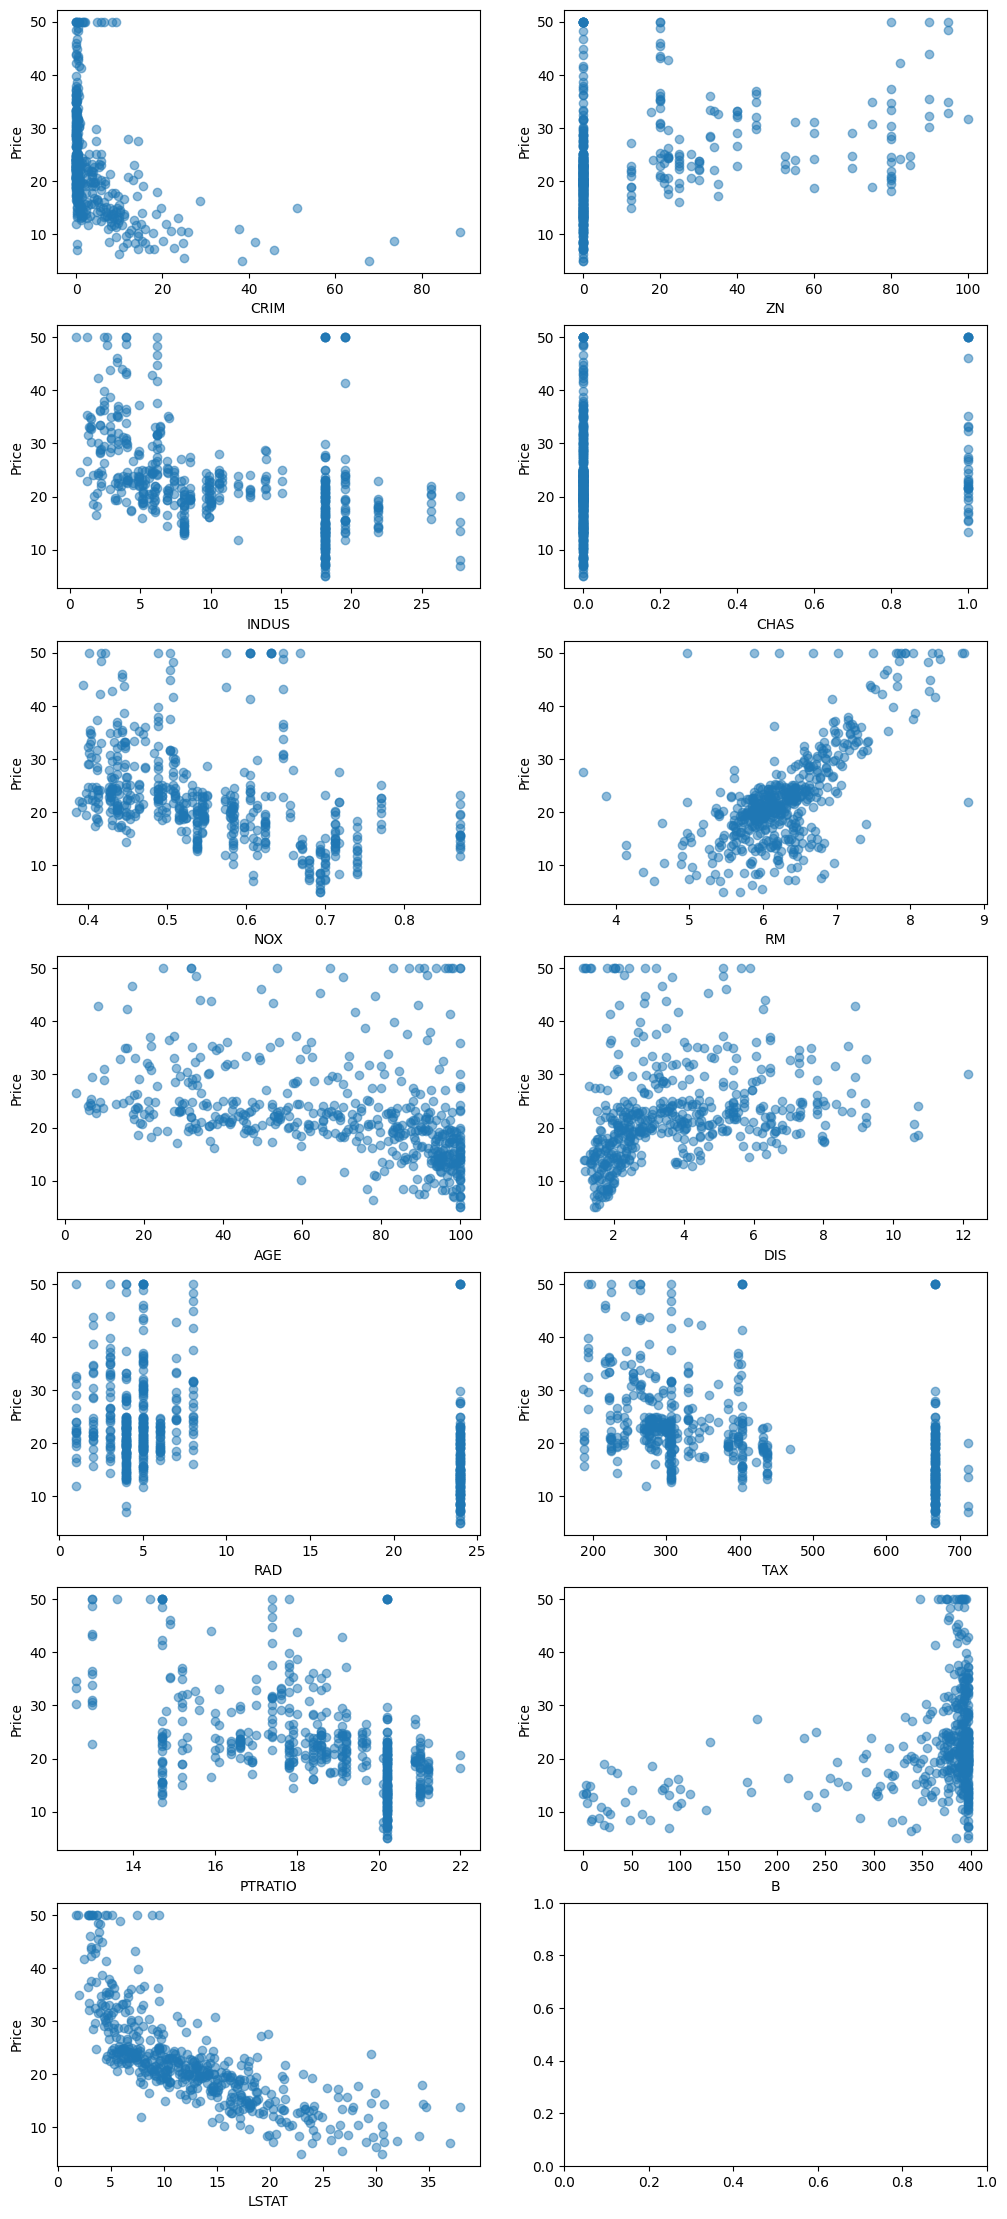

In [70]:
_, ax = plt.subplots(nrows, 2, figsize=(12, nrows*4))

for i in range(len(data[0])):
    row = i // 2
    col = i % 2

    ax[row, col].scatter(l[i], target, alpha=0.5)
    ax[row, col].set_xlabel(description[i])
    ax[row, col].set_ylabel("Price")

In [87]:
# Phase preprocessing data
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer

In [102]:
poly2 = PolynomialFeatures(degree=2, include_bias=False)
parabola = FunctionTransformer(lambda x: (x**2 - 30 ) + 5)

In [103]:
RM_2 = poly2.fit_transform(l[5])
LStat = parabola.fit_transform(l[12])

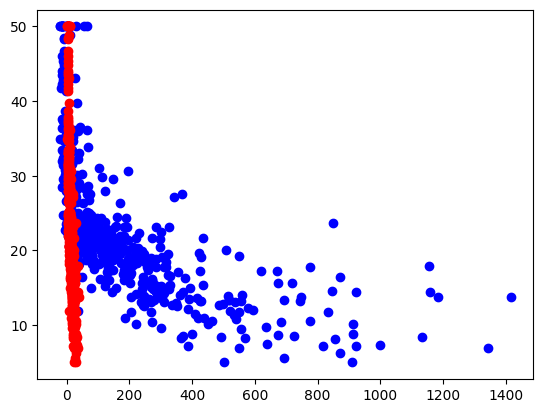

In [104]:
plt.scatter(LStat, target, color="blue")
plt.scatter(l[12], target, color="red")

In [107]:
train_data = np.hstack([RM_2, LStat])
train_data

array([[ 6.575   , 43.230625, -0.1996  ],
       [ 6.421   , 41.229241, 58.5396  ],
       [ 7.185   , 51.624225, -8.7591  ],
       ...,
       [ 6.976   , 48.664576,  6.8096  ],
       [ 6.794   , 46.158436, 16.9904  ],
       [ 6.03    , 36.3609  , 37.0944  ]])

In [108]:
model = linear_model.LinearRegression()

In [109]:
model.fit(train_data, target)

LinearRegression()

In [110]:
print(model.coef_, model.intercept_)

[-3.76863044e+01  3.39033959e+00 -1.75568648e-02] 127.0655315673908


In [111]:
result = model.predict(train_data)

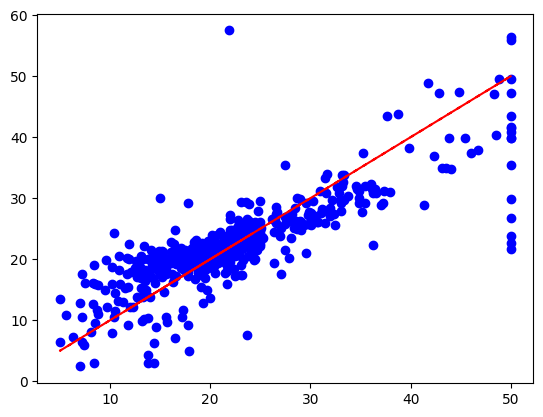

In [117]:
plt.plot(target, target, linestyle="--", color="red")
plt.scatter(target, result, color="blue")

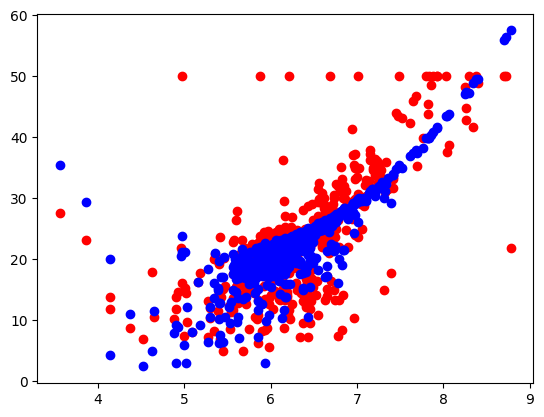

In [120]:
plt.scatter(l[5], target, color="red")
plt.scatter(l[5], result, color="blue")